In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [97]:
# Read in the CSV file with the ERF data
erf_df = pd.read_csv('https://raw.githubusercontent.com/ClimateIndicator/forcing-timeseries/main/output/ERF_best_aggregates_1750-2022.csv')


In [98]:
erf_df = erf_df.rename(columns={'Unnamed: 0': 'Year'})

In [99]:
# Set the 'Year' column as the index
erf_df.set_index('Year', inplace=True)

In [100]:
rolling_mean = erf_df.rolling(window=10).mean()

In [101]:
erf_trend = (rolling_mean - rolling_mean.shift(10))

In [102]:
y=erf_trend['anthro'].values
x=erf_trend.index.values


In [103]:
# Read in the CSV file with the temperature data
GWI_df = pd.read_csv('https://raw.githubusercontent.com/ClimateIndicator/anthropogenic-warming-assessment/master/global-warming-index/results/Walsh_GMST_timeseries_6048000.csv')
GWI_df = GWI_df.drop([0, 1])
GWI_df = GWI_df.rename(columns={'variable': 'Year'})
# Set the 'Year' column as the index
GWI_df['Year'] = GWI_df['Year'].astype(int)
GWI_df.set_index('Year', inplace=True)
rolling_mean_GWI = GWI_df.rolling(window=10).mean()
GWI_trend = (rolling_mean_GWI - rolling_mean_GWI.shift(10))
y_GWI=GWI_trend['Ant.4'].values
x_GWI=GWI_trend.index.values



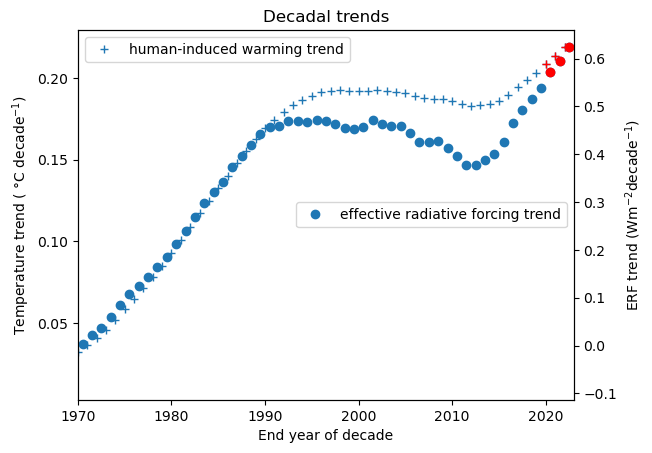

In [106]:
# Create a figure and axis object
fig, ax1 = plt.subplots()

# Create a twin axis object
ax2 = ax1.twinx()

# Plot each series on its respective axis
ax2.plot(x,y,marker='o', linestyle='None',label='effective radiative forcing trend')
ax2.plot(x[-3:], y[-3:], marker='o', color='red',linestyle='None')

ax1.plot(x_GWI,y_GWI,marker='+', linestyle='None',label='human-induced warming trend')
ax1.plot(x_GWI[-3:], y_GWI[-3:], marker='+', color='red',linestyle='None')

# Add axis labels and legend
ax1.set_xlabel('End year of decade')
ax2.set_ylabel('ERF trend (Wm$^{-2}$decade$^{-1}$)')
ax1.set_ylabel('Temperature trend ( °C decade$^{-1}$)')

ax1.legend(loc='best')
ax2.legend(loc='center right')
plt.title('Decadal trends')
plt.xlim([1970,2023])

# Show the plot
plt.show()
fig.savefig('../plots/decadal_trends.png')